In [1]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_origin
from rasterio.features import shapes
from shapely.geometry import shape

import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import shapely
from shapely.geometry import Polygon

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
pwd

'/data/private/Thesis'

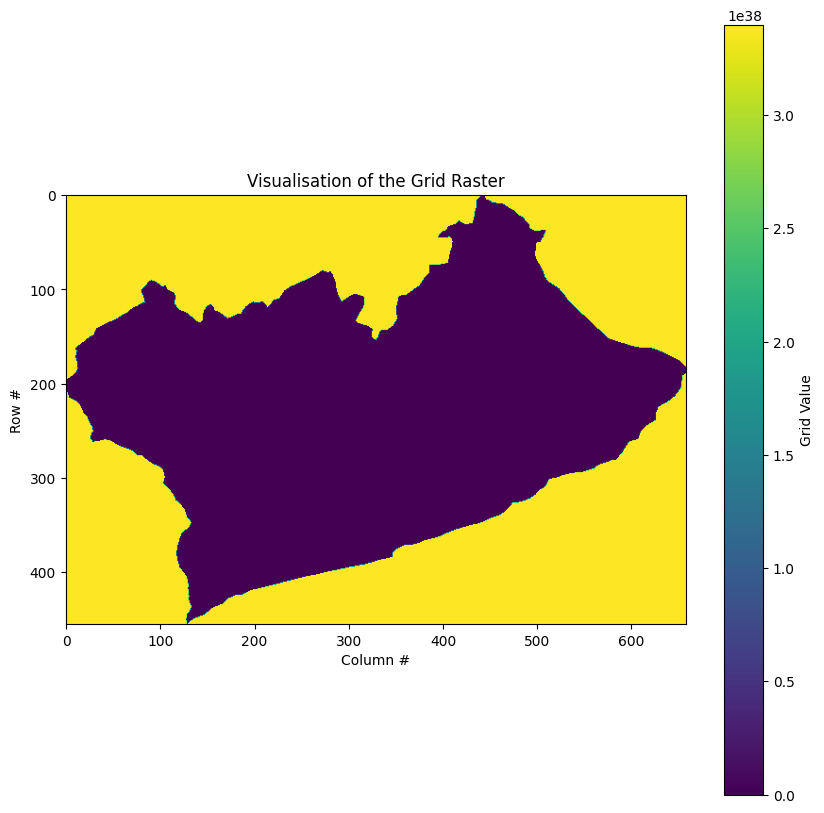

In [3]:
# Path to the raster file
raster_path = '/home/jovyan/private/Thesis/Accra_100mGrids/'
# Open the raster file
with rasterio.open(raster_path + 'Accra_waste_raster.tif') as src:
    # Read the first band
    raster_data = src.read(1)

    # Set up the figure
    plt.figure(figsize=(10, 10))
    
    # Display the raster data
    plt.imshow(raster_data, cmap='viridis')
    
    # Add a colorbar to show the values
    plt.colorbar(label='Grid Value')
    
    # Add title and labels as needed
    plt.title('Visualisation of the Grid Raster')
    plt.xlabel('Column #')
    plt.ylabel('Row #')
    
    # Show the plot
    plt.show()

In [5]:
import geopandas as gpd
import rasterio
from shapely.geometry import box

def raster_to_polygons(raster_path):
    # Open the raster file
    with rasterio.open(raster_path) as src:
        # Read the raster data
        raster = src.read(1)
        # Get the affine transformation for the raster
        transform = src.transform

    # Initialize an empty list to store polygons
    polygons = []
    values = []

    # Iterate over the raster array
    for row in range(raster.shape[0]):
        for col in range(raster.shape[1]):
            # Get pixel value
            pixel_value = raster[row, col]
            # Get pixel coordinates
            x_min, y_max = transform * (col, row)
            x_max, y_min = transform * (col + 1, row + 1)

            # Create a polygon for the pixel
            polygon = box(x_min, y_min, x_max, y_max)
            polygons.append(polygon)
            values.append(pixel_value)

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame({'value': values, 'geometry': polygons}, crs=src.crs)

    return gdf

# Example usage
raster_path = '/home/jovyan/private/Thesis/Accra_100mGrids/Accra_waste_raster.tif'
polygons_gdf = raster_to_polygons(raster_path)
print(polygons_gdf)


               value                                           geometry
0       3.400000e+38  POLYGON ((774766.663 650708.135, 774766.663 65...
1       3.400000e+38  POLYGON ((774866.663 650708.135, 774866.663 65...
2       3.400000e+38  POLYGON ((774966.663 650708.135, 774966.663 65...
3       3.400000e+38  POLYGON ((775066.663 650708.135, 775066.663 65...
4       3.400000e+38  POLYGON ((775166.663 650708.135, 775166.663 65...
...              ...                                                ...
300043  3.400000e+38  POLYGON ((840066.663 605208.135, 840066.663 60...
300044  3.400000e+38  POLYGON ((840166.663 605208.135, 840166.663 60...
300045  3.400000e+38  POLYGON ((840266.663 605208.135, 840266.663 60...
300046  3.400000e+38  POLYGON ((840366.663 605208.135, 840366.663 60...
300047  3.400000e+38  POLYGON ((840466.663 605208.135, 840466.663 60...

[300048 rows x 2 columns]


<AxesSubplot: >

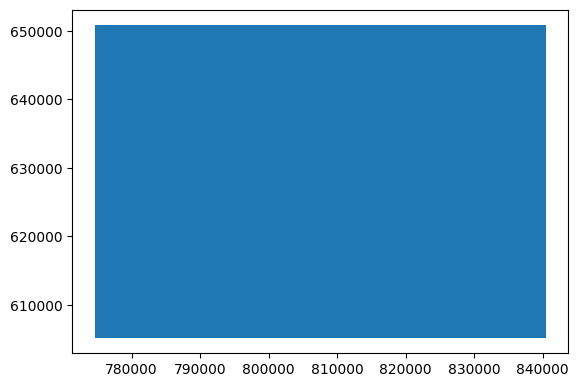

In [6]:
polygons_gdf.plot()

In [8]:
# # Example: Save the GeoDataFrame to a new shapefile
save_path = '/home/jovyan/private/Thesis/Accra_100mGrids/'
polygons_gdf.to_file(save_path + 'Accra_100mgrids.shapefile')

print("Extraction complete. The polygons with centroids within the study area have been saved.")

Extraction complete. The polygons with centroids within the study area have been saved.


<AxesSubplot: >

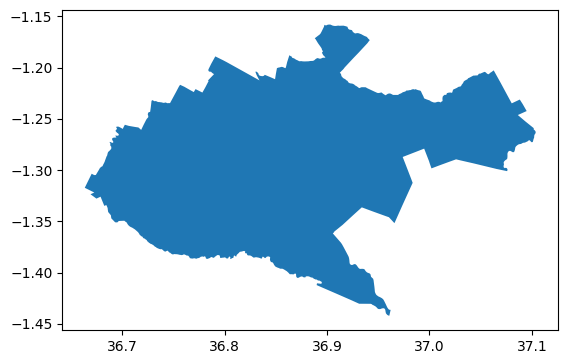

In [55]:
bound_path = '/home/jovyan/private/momepy/'
N_Bound= gpd.read_file(bound_path + 'nairobi.shp')
N_Bound.plot()

In [56]:
polygons_gdf = polygons_gdf.to_crs('EPSG:32737')
polygons_gdf.crs

<Derived Projected CRS: EPSG:32737>
Name: WGS 84 / UTM zone 37S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 36°E and 42°E, southern hemisphere between 80°S and equator, onshore and offshore. Kenya. Mozambique. Tanzania.
- bounds: (36.0, -80.0, 42.0, 0.0)
Coordinate Operation:
- name: UTM zone 37S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
# # Example: Save the GeoDataFrame to a new shapefile
polygons_gdf.to_file('Grids_100m.shapefile')

print("Extraction complete. The polygons with centroids within the study area have been saved.")

Extraction complete. The polygons with centroids within the study area have been saved.


In [58]:
N_Bound = N_Bound.to_crs('EPSG:32737')
N_Bound.crs

<Derived Projected CRS: EPSG:32737>
Name: WGS 84 / UTM zone 37S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 36°E and 42°E, southern hemisphere between 80°S and equator, onshore and offshore. Kenya. Mozambique. Tanzania.
- bounds: (36.0, -80.0, 42.0, 0.0)
Coordinate Operation:
- name: UTM zone 37S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [59]:
# Clip the polygons_gdf to the study area boundary
clipped_gdf = gpd.clip(polygons_gdf, N_Bound)
print(clipped_gdf)
# Now 'clipped_gdf' contains the polygons clipped to the study area boundary
# You can save it to a shapefile or perform further analysis

# Example: Save the clipped GeoDataFrame to a new shapefile
# clipped_gdf.to_file('clipped_polygons.shp')

print("Clipping complete. The clipped polygons have been saved.")


        value                                           geometry
130559   8549  POLYGON ((261883.509 9845365.525, 261983.509 9...
130558      0  POLYGON ((261883.509 9845365.525, 261883.509 9...
130069   8458  POLYGON ((261883.509 9845365.525, 261883.509 9...
130067      0  POLYGON ((261783.509 9845465.525, 261783.509 9...
130068   8500  POLYGON ((261783.509 9845465.525, 261883.509 9...
...       ...                                                ...
24943   10104  POLYGON ((284383.509 9866865.525, 284283.509 9...
24454       0  POLYGON ((284402.495 9866965.525, 284434.385 9...
26887       0  POLYGON ((282783.509 9866565.525, 282783.509 9...
25910       0  POLYGON ((283083.509 9866665.525, 283043.126 9...
24942       0  POLYGON ((284283.509 9866865.525, 284264.737 9...

[71969 rows x 2 columns]
Clipping complete. The clipped polygons have been saved.


<AxesSubplot: >

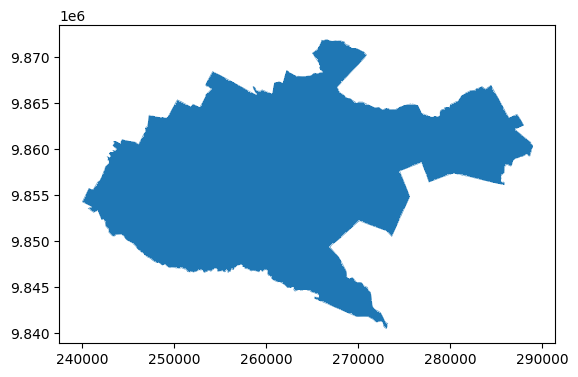

In [60]:
clipped_gdf.plot()

In [61]:
# Example: Save the clipped GeoDataFrame to a new shapefile
clipped_gdf.to_file('clipped_polygons.shapefile')

print("Clipping complete. The clipped polygons have been saved.")

Clipping complete. The clipped polygons have been saved.


In [42]:
# import geopandas as gpd

# Load your study area boundary GeoDataFrame (replace with your actual data)
# study_area_boundary_gdf = gpd.read_file('path_to_study_area_boundary.shp')

# Calculate the centroids of the grid polygons
polygons_gdf['centroid'] = polygons_gdf.geometry.centroid

# Perform a spatial join between the centroids and the study area boundary
# This will keep only the grid polygons whose centroids are within the study area
centroids_within_study_area_gdf = gpd.sjoin(polygons_gdf.set_geometry('centroid'), N_Bound, how='inner', op='within')

# Reset the geometry to the original polygons
centroids_within_study_area_gdf = centroids_within_study_area_gdf.set_geometry('geometry')

# Drop the index_right column generated by the spatial join
centroids_within_study_area_gdf = centroids_within_study_area_gdf.drop(columns=['index_right'])

# Now 'centroids_within_study_area_gdf' contains the polygons with centroids in the study area
# You can save it to a shapefile or perform further analysis

# # Example: Save the GeoDataFrame to a new shapefile
# centroids_within_study_area_gdf.to_file('centroids_within_study_area.shp')

print("Extraction complete. The polygons with centroids within the study area have been saved.")


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Extraction complete. The polygons with centroids within the study area have been saved.


In [44]:
centroids_within_study_area_gdf.head()

,value,geometry,centroid,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo
265,6648,"POLYGON ((266583.509 9871865.525, 266583.509 9...",POINT (266533.509 9871915.525),1.658061,0.057496,Nairobi,KE047,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None
266,6676,"POLYGON ((266683.509 9871865.525, 266683.509 9...",POINT (266633.509 9871915.525),1.658061,0.057496,Nairobi,KE047,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None
750,6432,"POLYGON ((266083.509 9871765.525, 266083.509 9...",POINT (266033.509 9871815.525),1.658061,0.057496,Nairobi,KE047,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None
751,6453,"POLYGON ((266183.509 9871765.525, 266183.509 9...",POINT (266133.509 9871815.525),1.658061,0.057496,Nairobi,KE047,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None
752,6476,"POLYGON ((266283.509 9871765.525, 266283.509 9...",POINT (266233.509 9871815.525),1.658061,0.057496,Nairobi,KE047,None,None,None,Kenya,KE,2017-11-03,2019-10-31,None


In [46]:
centroids_within_study_area_gdf.shape


(70797, 15)

<AxesSubplot: >

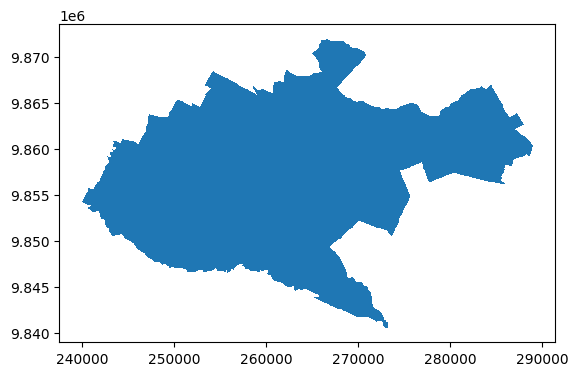

In [47]:
centroids_within_study_area_gdf.plot()


In [51]:
# # Example: Save the GeoDataFrame to a new shapefile
centroids_within_study_area_gdf.to_file('grids_study_area.shapefile')
print("Extraction complete. The polygons with centroids within the study area have been saved.")

TypeError: Cannot interpret '<geopandas.array.GeometryDtype object at 0x7f2923e62520>' as a data type